<a href="https://colab.research.google.com/github/scskalicky/creative_naming_lsa/blob/main/analyse_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TO DO


- Then explore clusterings at different cluster sizes, maybe up to 10? For each...group?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load in the saved dictionaries
import pickle

#reload saved NES and ROM semantic similarity dictionaries
nes_file = open(r'/content/drive/MyDrive/creative_naming/nes_sims.pkl', 'rb')
nes_sims = pickle.load(nes_file)
nes_file.close()

rom_file = open(r'/content/drive/MyDrive/creative_naming/rom_sims.pkl', 'rb')
rom_sims = pickle.load(rom_file)
rom_file.close()

In [4]:
nes_sims.keys()

dict_keys(['balloon', 'box', 'carrot', 'fork', 'shovel', 'toilet', 'couch', 'glasses', 'wallet'])

In [5]:
len(nes_sims.values())

dict_length = 0
for key in nes_sims.keys():
  dict_length = dict_length + len(nes_sims[key])
  print(dict_length)

47
102
153
196
227
283
343
404
436


Because there were repeated answers, the dictionaries will not have repeats. so we want to get the old csv and add the values to each row, to repopulate the repeats with the average values. 


### **Easy calculations first, get average similarity for each answer**


In [6]:
import statistics
from collections import defaultdict

nes_averages = defaultdict(dict)

for item in nes_sims.keys():
  for answer in nes_sims[item].keys():
    values = [v for v in nes_sims[item][answer].values()]
    nes_averages[item][answer] = statistics.mean(values)

In [7]:
nes_averages['balloon']['air ball']

0.4814808192779182

In [ ]:
rom_averages = defaultdict(dict)

for item in rom_sims.keys():
  for answer in rom_sims[item].keys():
    values = [v for v in rom_sims[item][answer].values()]
    #rom_averages.append(['English L2', item, answer, statistics.mean(values)])
    rom_averages[item][answer] = statistics.mean(values)
rom_averages

In [9]:
# get the old raw data to add the values. 
import pandas as pd
raw_dat = pd.read_csv('/content/drive/MyDrive/creative_naming/creative_naming_raw_answers.csv')
raw_dat_nes = raw_dat.loc[(raw_dat['group'] == 'NES') & (raw_dat['on.task'] == 1)].copy()
raw_dat_nes = raw_dat_nes.replace("NES", "English L1")

raw_dat_rom = raw_dat.loc[(raw_dat['group'] == 'ROM') & (raw_dat['on.task'] == 1)].copy()
raw_dat_rom = raw_dat_rom.replace("ROM", 'English L2')

In [10]:
# add averages to nes data
for index, row in raw_dat_nes.iterrows():
  item = raw_dat_nes.loc[index, 'item']
  answer = raw_dat_nes.loc[index, 'cleaned_answer']

  raw_dat_nes.loc[index, 'avg_sim'] = nes_averages[item][answer]

In [ ]:
raw_dat_nes

In [11]:
# add averages to rom data
for index, row in raw_dat_rom.iterrows():
  item = raw_dat_rom.loc[index, 'item']
  answer = raw_dat_rom.loc[index, 'cleaned_answer']

  raw_dat_rom.loc[index, 'avg_sim'] = rom_averages[item][answer]

In [14]:
# create combined version of the data
avg_sims = pd.concat([raw_dat_nes, raw_dat_rom])
avg_sims.columns

Index(['subject', 'group', 'item', 'original_answer', 'cleaned_answer',
       'on.task', 'avg_sim'],
      dtype='object')

In [21]:
# calculate summary stats - mean, range, sd for group / items
avg_sims.groupby(['group', 'item'])['avg_sim'].describe()

count      mean       std  ...       50%       75%       max
group      item                                ...                              
English L1 balloon   63.0  0.410784  0.070278  ...  0.433016  0.458589  0.488554
           box       63.0  0.384180  0.087194  ...  0.403722  0.453623  0.522475
           carrot    65.0  0.335845  0.078288  ...  0.335227  0.404878  0.444092
           couch     64.0  0.366208  0.080763  ...  0.371863  0.426596  0.505306
           fork      64.0  0.398706  0.075965  ...  0.422021  0.450595  0.488537
           glasses   67.0  0.386572  0.095945  ...  0.398289  0.459565  0.504471
           shovel    64.0  0.466173  0.078905  ...  0.470733  0.527766  0.565828
           toilet    63.0  0.432801  0.091164  ...  0.439560  0.498718  0.546229
           wallet    64.0  0.506617  0.093566  ...  0.509363  0.584954  0.584954
English L2 balloon   75.0  0.362702  0.082735  ...  0.381900  0.425881  0.469742
           box       74.0  0.281305  0.064148  ...  0.283655  0.329725  0.420146
           carrot    74.0  0.369596  0.097297  ...  0.381385  0.464919  0.495027
           couch     74.0  0.310567  0.080781  ...  0.321296  0.363281  0.470349
           fork      74.0  0.332995  0.064151  ...  0.333772  0.385048  0.457263
           glasses   75.0  0.348898  0.081817  ...  0.353789  0.420671  0.483133
           shovel    74.0  0.373186  0.078764  ...  0.384555  0.439225  0.472167
           toilet    69.0  0.281266  0.076989  ...  0.290325  0.352666  0.419524
           wallet    76.0  0.450784  0.088117  ...  0.512827  0.514774  0.520615

[18 rows x 8 columns]

In [22]:
avg_sims.groupby('group')['avg_sim'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
English L1,577.0,0.409519,0.096915,0.118631,0.344411,0.423410,0.475488,0.584954
English L2,665.0,0.346531,0.093979,0.078877,0.277500,0.351615,0.415646,0.520615


In [36]:
# output the data for other analysis
avg_sims.to_csv('/content/drive/MyDrive/creative_naming/avg_sim_combined.csv')

## plotting the similairities

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

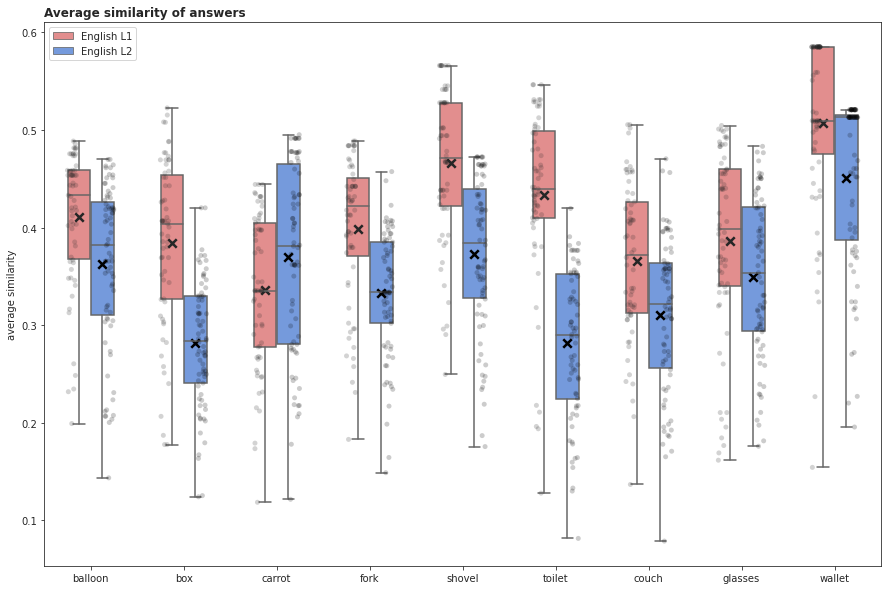

In [25]:
# plotting the joined data

# you can use this to control global plot options
#sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})   

xdat = 'item'
ydat = 'avg_sim'

sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(15,10)) 

a = sns.boxplot(x = xdat, y = ydat, 
                data = avg_sims, 
                hue = 'group', 
                whis = [0, 100], 
                width = .5, 
               # palette = ['white, white'])
                palette = {'English L1': 'lightcoral', 'English L2':'cornflowerblue'})

sns.stripplot(x = xdat, y = ydat, data = avg_sims, 
              hue = 'group', 
              dodge = .9, 
              alpha = .2, 
              color = 'black')
              #palette = ['lightcoral', 'cornflowerblue'])

sns.pointplot(y = ydat, x = xdat, hue = "group",
              data = avg_sims,
              dodge = .25,
              join = False,
              color = 'black',
              #palette = ['cornflowerblue','lightcoral'],
              markers = 'x', 
              size = 10,
              scale = 1.25, 
              ci = None)

# removes extra items added to legend (guess it just slices to the first 2, clever)
handles, labels = a.get_legend_handles_labels()
a.legend(handles[:2], labels[:2])

ax.set(xlabel = '', ylabel = 'average similarity')
ax.set_title('Average similarity of answers', loc = 'left', weight = 'bold')
#weight='bold'

# if you want custom lines use this shit
#for i, artist in enumerate(ax.artists):
 # if i%2 == 0:
  #  artist.set_edgecolor('lightcoral')
  #else:
   # artist.set_edgecolor('cornflowerblue')  
  #artist.set_facecolor('white')

 # for j in range(i*6,i*6+6):
  #  line = ax.lines[j]

   # if j in [0,1,4,5,8,9,12,13,16,17,20,21,24,25]:
    #  line.set_color('blue')
    #else:
     # line.set_color('black')
      #line.set_mfc('yellow')
      #line.set_mec('red')
    #line.set_linewidth(0.5)


plt.savefig('/content/drive/MyDrive/creative_naming/fig1.png', dpi = 400)

# Extraneous plots, just playing with seaborn

In [ ]:
# English L1 
#sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_nes, whis = [0, 100], width=.5, color = 'white')

fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_nes, width = .3, whis = [0, 100], color = 'white')

#ax.set_xlim(0,1)
sns.stripplot(x = "avg_sim", y = "item", data = raw_dat_nes, size = 3, alpha = .4, color = 'black')

for i, artist in enumerate(ax.artists):
  # Set the linecolor on the artist to the facecolor, and set the facecolor to None
  #col = lighten_color(artist.get_facecolor(), 1.2)
  #col = 'yellow'
  artist.set_edgecolor('lightcoral')  

  for j in range(i*6,i*6+6):
    line = ax.lines[j]
    line.set_color('blue')
    #line.set_mfc('yellow')
    #line.set_mec('red')
    line.set_linewidth(0.5)

In [ ]:
#I like the custom outlines 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_rom, width = .3, whis = [0, 100], color = 'white')

#ax.set_xlim(0,1)
sns.stripplot(x = "avg_sim", y = "item", data = raw_dat_rom, size = 3, alpha = .4, color = 'black')

for i, artist in enumerate(ax.artists):
  # Set the linecolor on the artist to the facecolor, and set the facecolor to None
  #col = lighten_color(artist.get_facecolor(), 1.2)
  #col = 'yellow'
  artist.set_edgecolor('lightcoral')  

  for j in range(i*6,i*6+6):
    line = ax.lines[j]
    line.set_color('blue')
    #line.set_mfc('yellow')
    #line.set_mec('red')
    line.set_linewidth(0.5)

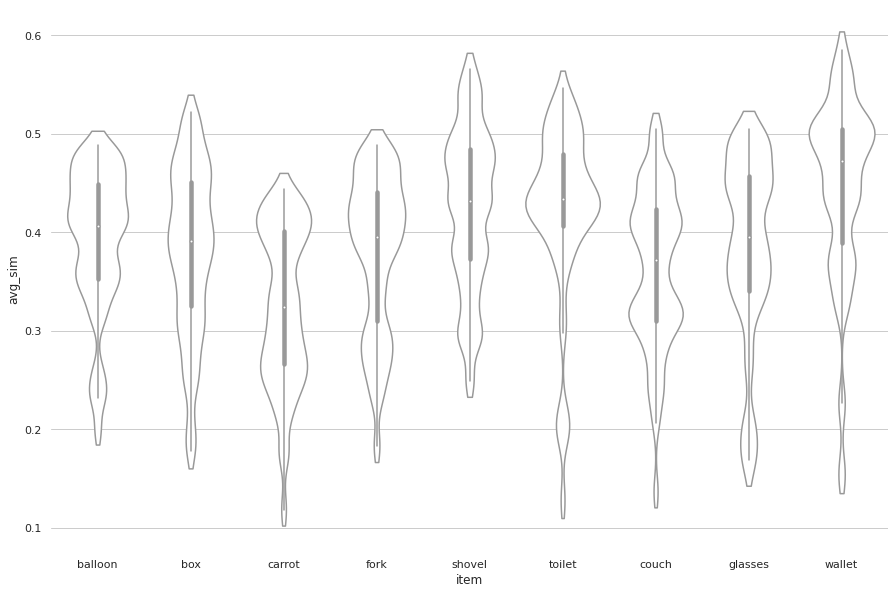

In [ ]:
# Violin plot for fun
plt.rcParams['figure.figsize'] = [15, 10]


nes_avg_sim = nes_summary['avg_sim']
rom_avg_sim = rom_summary['avg_sim']

sns.set_theme(style="whitegrid")

#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

#sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], palette="Set3", bw = .2, cut = 1)
sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], bw = .2, cut = 1, color = 'white')

sns.despine(left=True, bottom=True)


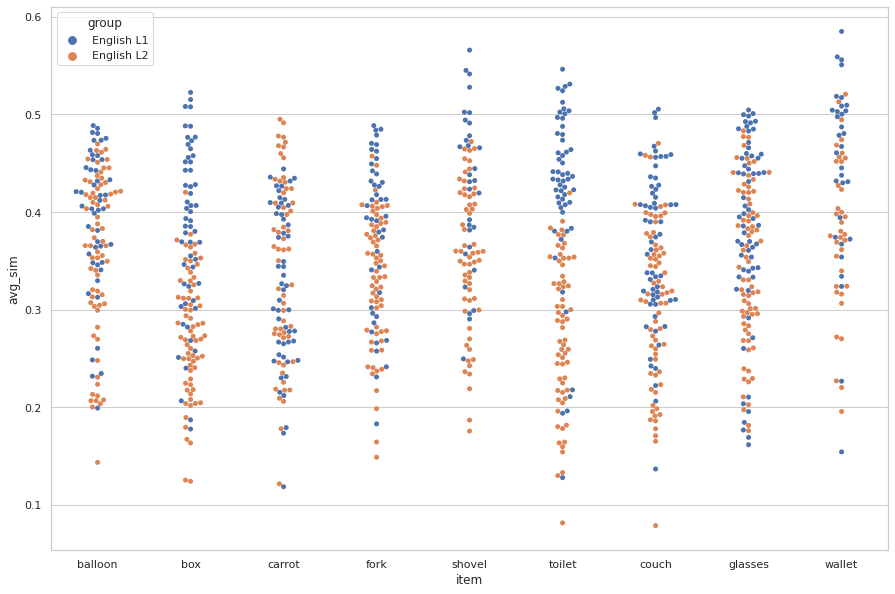

In [ ]:
sns.swarmplot(y = "avg_sim", x = "item", data = avg_sims, hue = 'group')


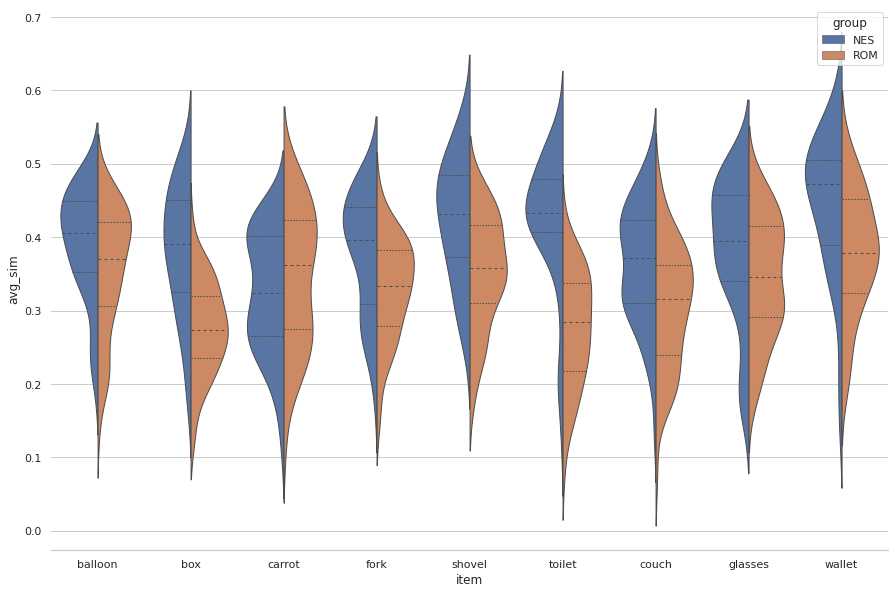

In [ ]:
sns.violinplot(data = avg_sims, x = "item", y = "avg_sim", hue = "group",
               split = True, inner = "quart", linewidth=1)
               #palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

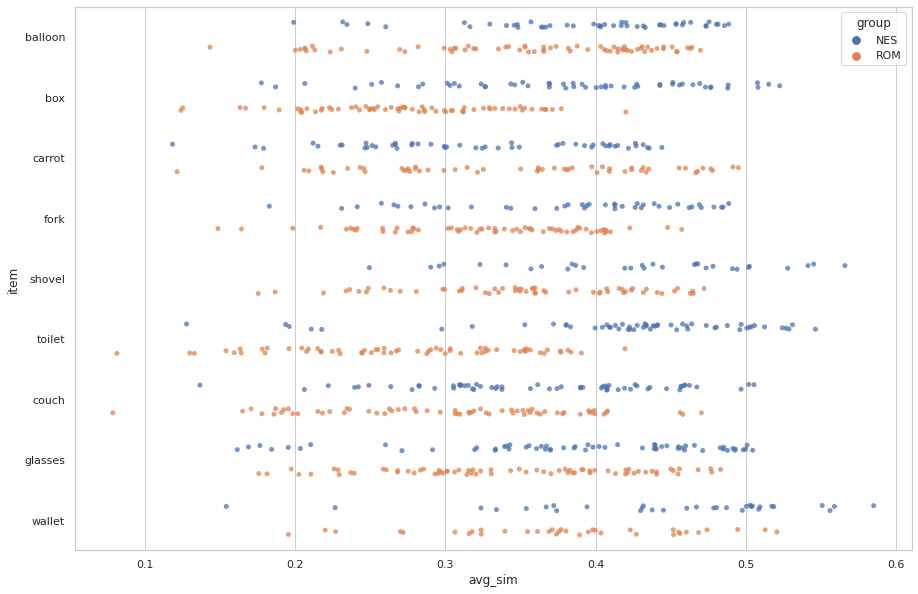

In [ ]:
sns.stripplot(x = "avg_sim", y = "item", data = avg_sims, hue = 'group', dodge = True, alpha = .75, zorder = 1)
